In [1]:
import pandas as pd  
import numpy as np  
from sklearn.model_selection import train_test_split 
import sklearn
from itertools import product                    
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
from datetime import datetime
import warnings                                  
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# Reading train_1.csv file to system
df = pd.read_csv(r"C:\\Users\umer_\Desktop\train_1.csv");


### Slicing data randomly to get train and testing data set

In [3]:
train_data = df.sample(frac = .8, random_state = np.random.randint(5))
test_data = df.sample(frac = .3, random_state = np.random.randint(3))

### Transposing the sliced data so we have dates in rows and total number of views of all the web articles for corresponding day

In [4]:
data_new = train_data.transpose()

### Changing article names to columns label

In [5]:
new_header = data_new.iloc[0]
data_new = data_new[1:] 
data_new.columns = new_header 
data_new.shape

(550, 116050)

### Dropping articles with nan values as a step for pre processing


In [6]:
data_new.dropna(axis =1, inplace = True)

### Getting sum of each day traffic to wiki web pages

In [7]:
data_new['Sum'] = data_new.sum(axis = 1)
data_new['Sum'] = data_new['Sum']  / np.max( data_new['Sum'])

### Changing timestamps to a new column i.e. making a tick vector corresponding to total days in sequence so data can be plotted against time

In [8]:

data_new['Ticks'] = range(0,len(data_new.index.values))


### Days vs number of views each day for sliced data

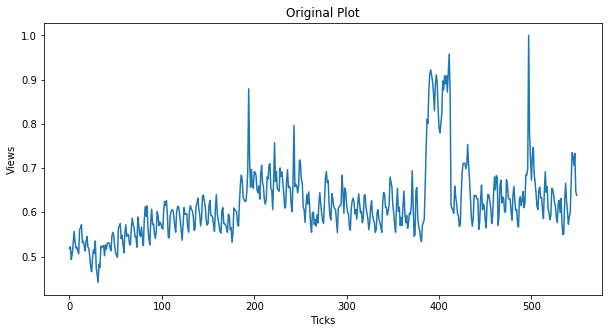

In [9]:
fig = plt.figure(1, figsize = (10,5))
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Ticks')
ax1.set_ylabel('Views')
ax1.set_title('Original Plot')
ax1.plot('Ticks','Sum', data = data_new);

In [10]:

data_1 = data_new

In [11]:
data_1 = data_1.reset_index()


### Calculating rolling mean of sum(total number of views / traffic each day) and plotting it against original sliced data to get a smoother curve

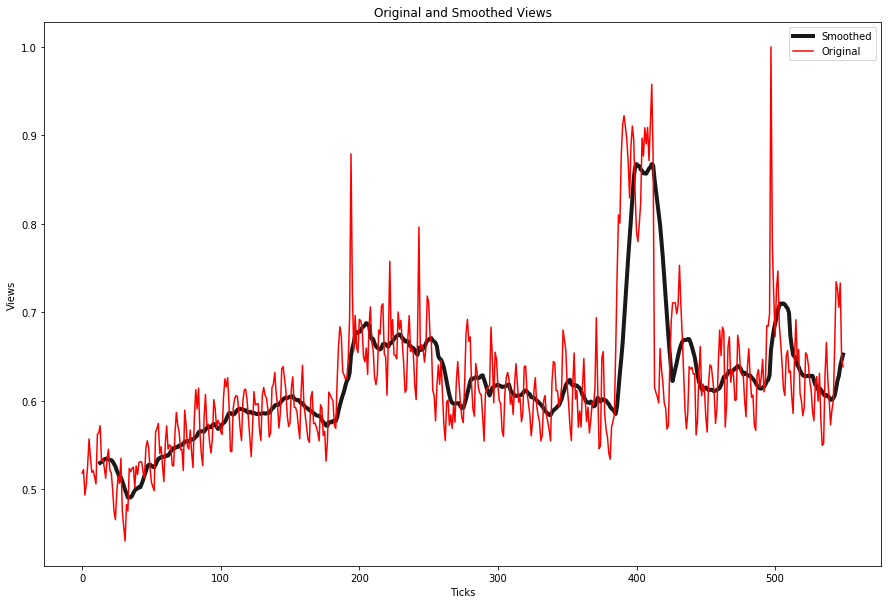

In [12]:
data_1['Rolling_Mean'] = data_1['Sum'].rolling(window=14).mean()
fig = plt.figure(figsize = (15,10));
ax = fig.add_subplot(111);
ax.plot(data_1['Ticks'], data_1['Rolling_Mean'], color = (0,0,0), linewidth = 4, alpha = .9, label = 'Smoothed');
ax.plot(data_1['Ticks'], data_1['Sum'], color =(1,0,0), label = 'Original');
ax.set_title('Original and Smoothed Views');
ax.set_xlabel('Ticks')
ax.set_ylabel('Views')
ax.legend(loc = 'best')

### Filtering data to remove nan values creted by rolling mean

In [13]:
filt_data = data_1[(data_1['Ticks'] >= 15) & (data_1['Ticks'] <= 550)]


### Taking ticks as x-axis and sum as y-axis

In [14]:
X = filt_data.iloc[:,-2]
Y = filt_data.iloc[:,-1]


In [15]:
X_mean = np.mean(X)
Y_mean = np.mean(Y)



### Least squares Linear Regression Method

In [16]:
num = 0
den = 0

num_1 = (filt_data['Ticks'] - filt_data['Ticks'].mean())*(filt_data['Sum'] - filt_data['Sum'].mean())
den_1 = (filt_data['Ticks'] - filt_data['Ticks'].mean())**2
num = np.sum(num_1)
den = np.sum(den_1)
m = num / den
c = Y_mean - m*X_mean

print (m, c)

0.00022775071121789402 0.5557305772037127


### Findind a best fit line

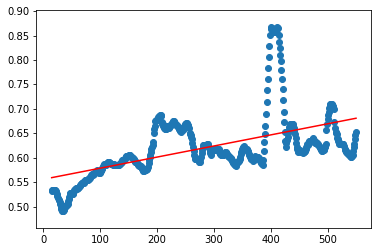

In [17]:
Y_pred = m*filt_data['Ticks'] + c
plt.scatter(X, Y) 
plt.plot([min(filt_data['Ticks']), max(filt_data['Ticks'])], [min(Y_pred), max(Y_pred)], color='red') # predicted
plt.show()

### Loss function of Least square method

In [18]:
loss = np.sum((filt_data['Rolling_Mean'] - Y_pred)**2)
print(loss)

1.6892143687169487


### Using sklearn Linear Regression Function

In [19]:
start_time = datetime.now()
model = LinearRegression().fit(filt_data[['Ticks']], filt_data[['Rolling_Mean']])
m = model.coef_[0]
b = model.intercept_
predictions = model.predict(filt_data[['Ticks']])
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))
predictions.shape

Duration: 0:00:01.113987


(535, 1)

In [20]:
predictions = model.predict(filt_data[['Ticks']])
predictions.shape

(535, 1)

In [21]:
predictions = pd.DataFrame(data = predictions, index = filt_data.index.values, columns = ['Pred'])

In [22]:
joined_df = filt_data.join(predictions, how = 'inner')


### Test Data

In [23]:
data_new_test = test_data.transpose()

### Performing the above mentioned steps on test data to compare it to train data

In [24]:
new_header = data_new_test.iloc[0]
data_new_test = data_new_test[1:] 
data_new_test.columns = new_header 
data_new_test.dropna(axis =1, inplace = True)
data_new_test['Sum'] = data_new_test.sum(axis = 1)
data_new_test['Sum'] = data_new_test['Sum']  / np.max( data_new_test['Sum'])
data_new_test['Ticks'] = range(0,len(data_new_test.index.values))
data_1_test = data_new_test
data_1_test = data_1_test.reset_index()
data_1_test['Rolling_Mean'] = data_1_test['Sum'].rolling(window=14).mean()
filt_data_test = data_1_test[(data_1_test['Ticks'] >= 15) & (data_1_test['Ticks'] <= 550)]
predictions_test = model.predict(filt_data_test[['Ticks']])
predictions_test = pd.DataFrame(data = predictions_test, index = filt_data_test.index.values, columns = ['Pred'])
joined_df_test = filt_data_test.join(predictions_test, how = 'inner')

### Plot of training and test data with best fit line

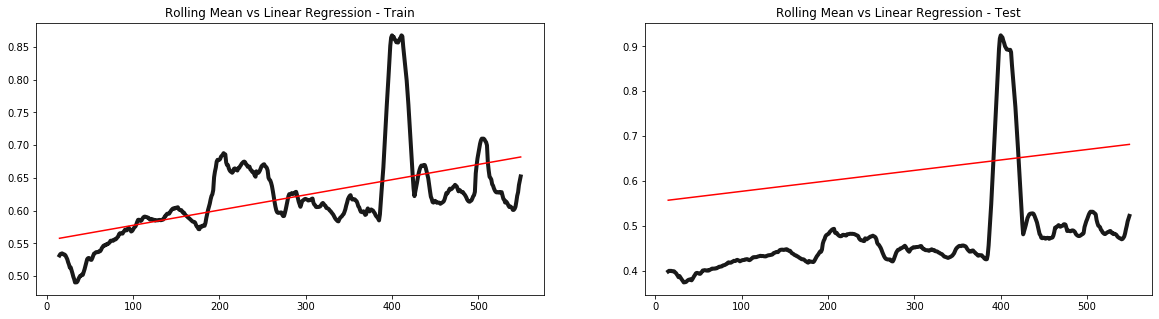

In [25]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5));
axes[0].plot(joined_df['Ticks'], joined_df['Rolling_Mean'], color = (0,0,0), linewidth = 4, alpha = .9, label = 'Rolling Mean');
axes[0].plot(joined_df['Ticks'], joined_df['Pred'], color =(1,0,0), label = 'Prediction');
axes[1].plot(joined_df_test['Ticks'], joined_df_test['Rolling_Mean'], color = (0,0,0), linewidth = 4, alpha = .9, label = 'Rolling Mean');
axes[1].plot(joined_df_test['Ticks'], joined_df_test['Pred'], color =(1,0,0), label = 'Prediction');
axes[0].set_title('Rolling Mean vs Linear Regression - Train');
axes[1].set_title('Rolling Mean vs Linear Regression - Test');

In [26]:
Linear_r_squared_train = sklearn.metrics.r2_score(joined_df['Sum'], joined_df['Pred'], multioutput = 'uniform_average')
Linear_r_squared_test = sklearn.metrics.r2_score(joined_df_test['Sum'], joined_df_test['Pred'], multioutput = 'uniform_average')
print('r^2 values for Linear Regression Train ' + str(Linear_r_squared_train) )
print('r^2 values for Linear Regression Test '+ str(Linear_r_squared_test) )

r^2 values for Linear Regression Train 0.1928606420257869
r^2 values for Linear Regression Test -1.5669752169310276


# Ridge Regression

In [27]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

### Creating training and test data for ridge regression by slicing data randomly

In [28]:
ridge_one_3_train = train_data
ridge_one_3_test = test_data

### Using sklearn Ridge function to train the model. Printing out the best fit line. 

In [29]:
ridge_data_new_train = ridge_one_3_train.transpose()
ridge_new_header = ridge_data_new_train.iloc[0]
ridge_data_new_train = ridge_data_new_train[1:] 
ridge_data_new_train.columns = ridge_new_header 
ridge_data_new_train.dropna(axis =1, inplace = True)
ridge_data_new_train['Sum'] = ridge_data_new_train.sum(axis = 1)
ridge_data_new_train['Sum'] = ridge_data_new_train['Sum']  / np.max( ridge_data_new_train['Sum'])
ridge_data_new_train['Ticks'] = range(0,len(ridge_data_new_train.index.values))
ridge_data_1_train = ridge_data_new_train
ridge_data_1_train = ridge_data_1_train.reset_index()
ridge_data_1_train['Rolling_Mean'] = ridge_data_1_train['Sum'].rolling(window=14).mean()
ridge_filt_data_train = ridge_data_1_train[(ridge_data_1_train['Ticks'] >= 15) & (ridge_data_1_train['Ticks'] <= 550)]



In [30]:
start_time = datetime.now()
i = 0.0
r = 0.0
r2_score = 0.0
r2_score_prev = 0.0
r2_score_list = []
r_list = []
for i in range(0,100):
    train_ridge = Ridge(alpha = r)
    train_ridge.fit(ridge_filt_data_train[['Ticks']], ridge_filt_data_train[['Rolling_Mean']])
    train_ridge_coeff = train_ridge.coef_
    train_ridge_intercept = train_ridge.intercept_
    train_predictions = train_ridge.predict(ridge_filt_data_train[['Ticks']])
    Ridge_r_squared_train = sklearn.metrics.r2_score(ridge_filt_data_train['Sum'], train_predictions, multioutput = 'uniform_average')
    r2_score_prev = Ridge_r_squared_train
    if (r2_score_prev > r2_score):
        r2_score = r2_score_prev
        r2_score_list.append(r2_score)
        r_list.append(r)
    i = i + 1
    r = r+0.1
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))
print(max(r2_score_list))
print(max(r_list))


Duration: 0:00:01.283159
0.19286064826245553
9.89999999999998


In [35]:
train_ridge_model = Ridge(alpha = 9.9)
train_ridge_model.fit(ridge_filt_data_train[['Ticks']], ridge_filt_data_train[['Rolling_Mean']])
train_ridge_model_coeff = train_ridge_model.coef_
train_ridge_model_intercept = train_ridge_model.intercept_
train_predictions_Ridge = train_ridge_model.predict(ridge_filt_data_train[['Ticks']])
train_predictions_Ridge = pd.DataFrame(data = train_predictions_Ridge, index = ridge_filt_data_train.index.values, columns = ['Pred'])
train_ridge_joined_dff = ridge_filt_data_train.join(train_predictions_Ridge, how = 'inner')

### Using sklearn Ridge function to test the model. Printing out the best fit line.

In [36]:
ridge_data_new_test = ridge_one_3_test.transpose()
test_ridge_new_header = ridge_data_new_test.iloc[0]
ridge_data_new_test = ridge_data_new_test[1:] 
ridge_data_new_test.columns = test_ridge_new_header 
ridge_data_new_test.dropna(axis =1, inplace = True)
ridge_data_new_test['Sum'] = ridge_data_new_test.sum(axis = 1)
ridge_data_new_test['Sum'] = ridge_data_new_test['Sum']  / np.max( ridge_data_new_test['Sum'])
ridge_data_new_test['Ticks'] = range(0,len(ridge_data_new_test.index.values))
ridge_data_1_test = ridge_data_new_test
ridge_data_1_test = ridge_data_1_test.reset_index()
ridge_data_1_test['Rolling_Mean'] = ridge_data_1_test['Sum'].rolling(window=14).mean()
ridge_filt_data_test = ridge_data_1_test[(ridge_data_1_test['Ticks'] >= 15) & (ridge_data_1_test['Ticks'] <= 550)]
test_predictions = train_ridge_model.predict(ridge_filt_data_test[['Ticks']])
test_ridge_predictions = pd.DataFrame(data = test_predictions, index = ridge_filt_data_test.index.values, columns = ['Pred'])
test_ridge_joined_dff = ridge_filt_data_test.join(test_ridge_predictions, how = 'inner')

### Ploting traing and test data along with best fit line

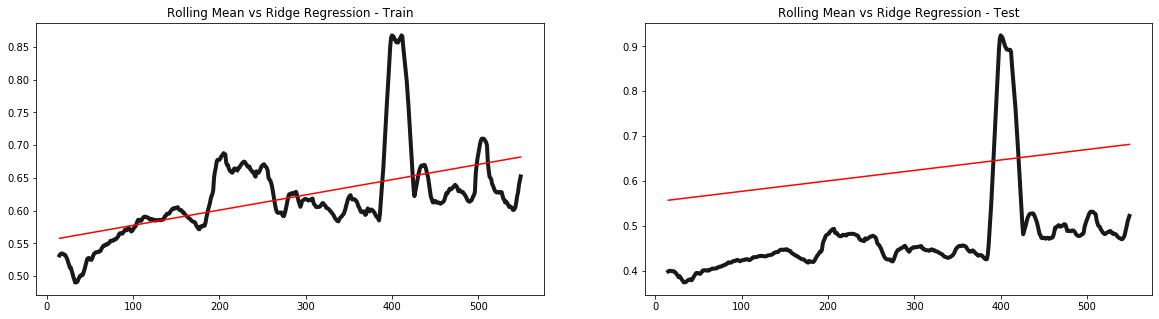

In [38]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5));
axes[0].plot(train_ridge_joined_dff['Ticks'], train_ridge_joined_dff['Rolling_Mean'], color = (0,0,0), linewidth = 4, alpha = .9, label = 'Rolling Mean');
axes[0].plot(train_ridge_joined_dff['Ticks'], train_ridge_joined_dff['Pred'], color =(1,0,0), label = 'Prediction');
axes[1].plot(test_ridge_joined_dff['Ticks'], test_ridge_joined_dff['Rolling_Mean'], color = (0,0,0), linewidth = 4, alpha = .9, label = 'Rolling Mean');
axes[1].plot(test_ridge_joined_dff['Ticks'], test_ridge_joined_dff['Pred'], color =(1,0,0), label = 'Prediction');
axes[0].set_title('Rolling Mean vs Ridge Regression - Train');
axes[1].set_title('Rolling Mean vs Ridge Regression - Test');

In [39]:
Ridge_r_squared_train = sklearn.metrics.r2_score(train_ridge_joined_dff['Sum'], train_ridge_joined_dff['Pred'], multioutput = 'uniform_average')
Ridge_r_squared_test = sklearn.metrics.r2_score(test_ridge_joined_dff['Sum'], test_ridge_joined_dff['Pred'], multioutput = 'uniform_average')
print('r^2 values for Ridge Regression Train ' + str(Ridge_r_squared_train) )
print('r^2 values for Ridge Regression Test '+ str(Ridge_r_squared_test) )

r^2 values for Ridge Regression Train 0.19286064826245553
r^2 values for Ridge Regression Test -1.56697525628972


# Lasso Regression

### Creating training and test data sets randomly

In [40]:
lasso_one_3_train = train_data
lasso_one_3_test = test_data

### Using sklearn Lasso Function to train the model and calculating best fit line

In [41]:
lasso_data_new_train = lasso_one_3_train.transpose()
lasso_new_header = lasso_data_new_train.iloc[0]
lasso_data_new_train = lasso_data_new_train[1:] 
lasso_data_new_train.columns = lasso_new_header 
lasso_data_new_train.dropna(axis =1, inplace = True)
lasso_data_new_train['Sum'] = lasso_data_new_train.sum(axis = 1)
lasso_data_new_train['Sum'] = lasso_data_new_train['Sum']  / np.max( lasso_data_new_train['Sum'])
lasso_data_new_train['Ticks'] = range(0,len(lasso_data_new_train.index.values))
lasso_data_1_train = lasso_data_new_train
lasso_data_1_train = lasso_data_1_train.reset_index()
lasso_data_1_train['Rolling_Mean'] = lasso_data_1_train['Sum'].rolling(window=14).mean()
lasso_filt_data_train = lasso_data_1_train[(lasso_data_1_train['Ticks'] >= 15) & (lasso_data_1_train['Ticks'] <= 550)]
start_time = datetime.now()
train_lasso = Lasso(alpha = 1);
train_lasso.fit(lasso_filt_data_train[['Ticks']], lasso_filt_data_train[['Rolling_Mean']])
train_lasso_coeff = train_lasso.coef_
train_lasso_intercept = train_lasso.intercept_
train_predictions_lasso = train_lasso.predict(lasso_filt_data_train[['Ticks']])
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))
train_lasso_predictions = pd.DataFrame(data = train_predictions_lasso, index = lasso_filt_data_train.index.values, columns = ['Pred'])
train_lasso_joined_dff = lasso_filt_data_train.join(train_lasso_predictions, how = 'inner')


Duration: 0:00:04.967939


### Using sklearn Lasso Function to test the model and getting best fit line

In [42]:
lasso_data_new_test = lasso_one_3_test.transpose()
test_lasso_new_header = lasso_data_new_test.iloc[0]
lasso_data_new_test = lasso_data_new_test[1:] 
# set the header row as the df header
lasso_data_new_test.columns = test_lasso_new_header 
# Lets see the 5 first rows of the new dataset
lasso_data_new_test.dropna(axis =1, inplace = True)
lasso_data_new_test['Sum'] = lasso_data_new_test.sum(axis = 1)
lasso_data_new_test['Sum'] = lasso_data_new_test['Sum']  / np.max( lasso_data_new_test['Sum'])
lasso_data_new_test['Ticks'] = range(0,len(lasso_data_new_test.index.values))
lasso_data_1_test = lasso_data_new_test
lasso_data_1_test = lasso_data_1_test.reset_index()
lasso_data_1_test['Rolling_Mean'] = lasso_data_1_test['Sum'].rolling(window=14).mean()
lasso_filt_data_test = lasso_data_1_test[(lasso_data_1_test['Ticks'] >= 15) & (lasso_data_1_test['Ticks'] <= 550)]
test_predictions_lasso = train_lasso.predict(lasso_filt_data_test[['Ticks']])
test_lasso_predictions = pd.DataFrame(data = test_predictions_lasso, index = lasso_filt_data_test.index.values, columns = ['Pred'])
test_lasso_joined_dff = lasso_filt_data_test.join(test_lasso_predictions, how = 'inner')

### Ploting training and test data with best fit line

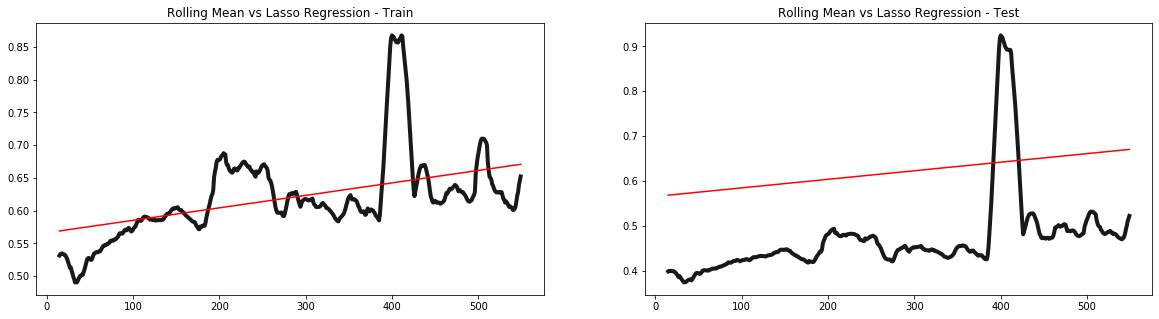

In [43]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5));
axes[0].plot(train_lasso_joined_dff['Ticks'], train_lasso_joined_dff['Rolling_Mean'], color = (0,0,0), linewidth = 4, alpha = .9, label = 'Rolling Mean');
axes[0].plot(train_lasso_joined_dff['Ticks'], train_lasso_joined_dff['Pred'], color =(1,0,0), label = 'Prediction');
axes[1].plot(test_lasso_joined_dff['Ticks'], test_lasso_joined_dff['Rolling_Mean'], color = (0,0,0), linewidth = 4, alpha = .9, label = 'Rolling Mean');
axes[1].plot(test_lasso_joined_dff['Ticks'], test_lasso_joined_dff['Pred'], color =(1,0,0), label = 'Prediction');
axes[0].set_title('Rolling Mean vs Lasso Regression - Train');
axes[1].set_title('Rolling Mean vs Lasso Regression - Test');


### R squared values

In [44]:
Lasso_r_squared_train =  sklearn.metrics.r2_score(train_lasso_joined_dff['Sum'], train_ridge_joined_dff['Pred'], multioutput = 'uniform_average')
Lasso_r_squared_test =  sklearn.metrics.r2_score(test_lasso_joined_dff['Sum'], test_lasso_joined_dff['Pred'], multioutput = 'uniform_average')
print('r^2 values for Lasso Regression '+ str(Lasso_r_squared_train) )
print('r^2 values for Lasso Regression '+ str(Lasso_r_squared_test) )

r^2 values for Lasso Regression 0.19286064826245553
r^2 values for Lasso Regression -1.5796418443650575


In [45]:
print('r^2 values for Linear Regression ' + str(Linear_r_squared_train) )
print('r^2 values for Ridge Regression ' + str(Ridge_r_squared_train) )
print('r^2 values for Lasso Regression '+ str(Lasso_r_squared_train) )

r^2 values for Linear Regression 0.1928606420257869
r^2 values for Ridge Regression 0.19286064826245553
r^2 values for Lasso Regression 0.19286064826245553
